# Denoising input data

In [63]:
from google.cloud import storage
import numpy as np
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as signal

In [51]:
audio=np.load('../raw_data/training_data/npy_sync_5cycles/39403_PV.npy')

In [9]:
'''
BUCKET_NAME = "le-fab88-bucket"

storage_filename = "/processed_data_1D/30_14_52/50238.npy"
local_filename = "raw_data/training_data/npy_sync_5cycles.2530.npy"
client = storage.Client()
bucket = client.bucket(BUCKET_NAME)
blob = bucket.blob(storage_filename)
blob.download_to_filename(local_filename)
'''

'\nBUCKET_NAME = "le-fab88-bucket"\n\nstorage_filename = f"/processed_data_1D/30_14_52/50238.npy"\nlocal_filename = "raw_data/2530.npy"\n\nclient = storage.Client()\nbucket = client.bucket(BUCKET_NAME)\nblob = bucket.blob(storage_filename)\nblob.download_to_filename(local_filename)\n'

# Measure Signal to noise 

In [14]:
def signal_to_noise_ratio(a, axis=0, ddof=0):
    m = a.mean(axis)**2
    sd = a.std(axis=axis, ddof=ddof)**2
    mean_snr = np.mean(np.where(sd == 0, 0, m/sd))
    return mean_snr

In [52]:
signal_to_noise_ratio(audio)

0.018101397855047857

# Denoising data

## Averaging the data

In [58]:
audio.shape

(12900,)

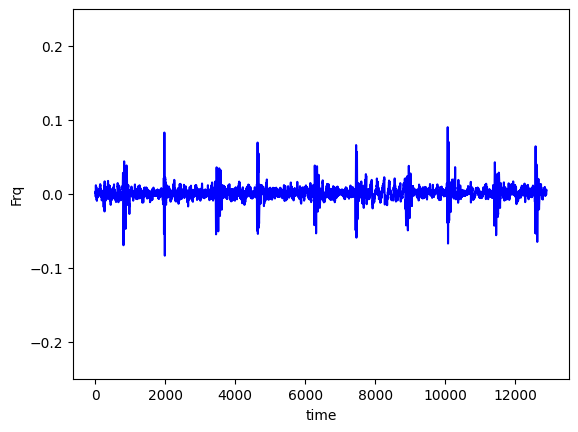

In [56]:
# Plot the Raw Data
plt.plot(audio, 'b-')
plt.ylabel('Frq')
plt.xlabel('time')
plt.ylim((-0.25,0.25));

In [65]:
def average_audio_and_plot(audio, window=15):
    average_audio = pd.Series(audio).rolling(window=window).mean()
    average_audio.plot(style='k')
    plt.ylabel('Frq')
    plt.xlabel('time')
    plt.ylim((-0.25,0.25));
    plt.show()
    return

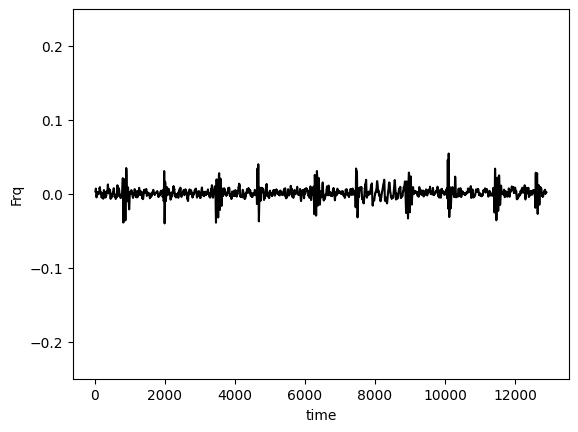

In [66]:
average_audio_and_plot(audio)

In [62]:
signal_to_noise_ratio(average_audio)

0.03338741655125738

## Daubechies Wavelets

In [ ]:
# First, design the Buterworth filter
N  = 2    # Filter order
Wn = 0.1 # Cutoff frequency
B, A = signal.daub(N, Wn, output='ba')
smooth_data = signal.filtfilt(B,A, audio)
plt.plot(ts,'r-')
plt.plot(smooth_data[0:500],'b-')
plt.show()